In [17]:
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from keras.datasets import mnist
from PIL import Image,ImageOps
import gradio as gr
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num of GPUs available are" , len(physical_devices))
#tf.config.experimentaal.set_memory_growth(physical_devices[0],True)

Num of GPUs available are 0


In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
y_train.dtype

dtype('uint8')

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

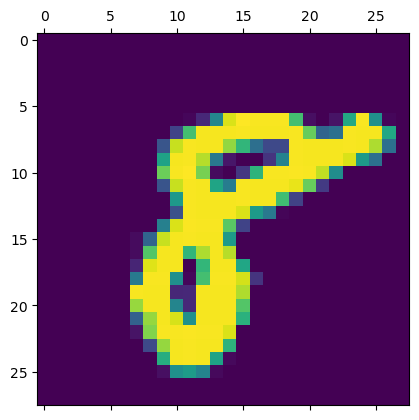

In [9]:
plt.matshow(x_train[769])
plt.show()

In [10]:
x_train_flatten = x_train.reshape(len(x_train),28*28)/255.0
x_test_flatten = x_test.reshape(len(x_test),28*28)/255.0

In [11]:
x_train_flatten.shape

(60000, 784)

In [12]:
x_test_flatten.shape

(10000, 784)

In [14]:
x_train_flatten[55]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [49]:
model = Sequential([
    Dense(units = 256,input_shape = (784,),activation = 'relu'),
    Dense(units = 256,activation = 'relu'),
    Dense(units = 10,activation = 'softmax')
])

In [50]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer = Adam(learning_rate=0.0001),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [52]:
model.fit(x = x_train_flatten,y = y_train,shuffle = True,validation_split = 0.1,batch_size = 20,epochs = 10,verbose = 2)

Epoch 1/10
2700/2700 - 9s - 3ms/step - accuracy: 0.8890 - loss: 0.4100 - val_accuracy: 0.9538 - val_loss: 0.1729
Epoch 2/10
2700/2700 - 8s - 3ms/step - accuracy: 0.9500 - loss: 0.1769 - val_accuracy: 0.9640 - val_loss: 0.1298
Epoch 3/10
2700/2700 - 8s - 3ms/step - accuracy: 0.9627 - loss: 0.1267 - val_accuracy: 0.9700 - val_loss: 0.1073
Epoch 4/10
2700/2700 - 7s - 3ms/step - accuracy: 0.9715 - loss: 0.0977 - val_accuracy: 0.9733 - val_loss: 0.0923
Epoch 5/10
2700/2700 - 7s - 3ms/step - accuracy: 0.9773 - loss: 0.0781 - val_accuracy: 0.9735 - val_loss: 0.0892
Epoch 6/10
2700/2700 - 7s - 3ms/step - accuracy: 0.9815 - loss: 0.0636 - val_accuracy: 0.9783 - val_loss: 0.0825
Epoch 7/10
2700/2700 - 8s - 3ms/step - accuracy: 0.9848 - loss: 0.0533 - val_accuracy: 0.9768 - val_loss: 0.0794
Epoch 8/10
2700/2700 - 7s - 3ms/step - accuracy: 0.9875 - loss: 0.0437 - val_accuracy: 0.9762 - val_loss: 0.0822
Epoch 9/10
2700/2700 - 8s - 3ms/step - accuracy: 0.9896 - loss: 0.0366 - val_accuracy: 0.9782 - 